In [58]:
# mlp 多层感知器
import torch
import math
import matplotlib.pyplot as plt
import numpy

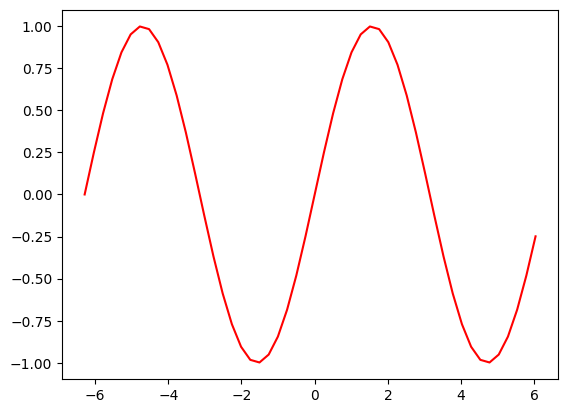

In [59]:
# 常量
EPOCH = 1000
MLP_LR = 0.01
left,right = -2 , 2
PI = math.pi
NUM = 50

# x,y是普通sinx 的torch tensor
x = torch.tensor( [(num*PI) for num in numpy.arange(left, right, (right-left)/NUM)],dtype = torch.float32)

y = torch.sin(x)
plt.plot(x,y,color = 'red')
plt.show()

In [60]:
class MLP(torch.nn.Module):
    def __init__(self):
        super().__init__()
        # nn.Linear定义一个神经网络的线性层
        '''
        torch.nn.Linear(in_features, # 输入的神经元个数
           out_features, # 输出神经元个数
           bias=True # 是否包含偏置
           )
        '''
        self.layer1 = torch.nn.Linear(1,20)
        self.layer2 = torch.nn.Linear(20,20)
        self.layer3 = torch.nn.Linear(20,1)

    def forward(self,x):
        x = self.layer1(x)
        # torch.nn.functional.relu(x) 激活函数
        x = torch.nn.functional.relu(x)

        x = self.layer2(x)
        x = torch.nn.functional.relu(x)
        
        x = self.layer3(x)

        return x

In [61]:
mlp = MLP()

# input_x和labels是训练网络时候用的输入和标签
input_x = x.reshape(-1,1)
labels = y.reshape(-1,1)

# 训练mlp
mlp_optimizer = torch.optim.Adam(mlp.parameters(), lr = MLP_LR)
## 每过step_size轮，将此前的学习率乘以gamma
scheduler=torch.optim.lr_scheduler.StepLR(mlp_optimizer, step_size=10, gamma=0.99)
mlp_loss=[]
lr_arr=[]

for epoch in range(EPOCH):
    lr_arr.append(mlp_optimizer.state_dict()['param_groups'][0]['lr'])
    
    preds=mlp(input_x)
    loss = torch.nn.functional.mse_loss(preds,labels)

    mlp_optimizer.zero_grad()
    loss.backward()
    # 更新优化器和调度器
    mlp_optimizer.step()
    scheduler.step()

    mlp_loss.append(loss.item())

    


    


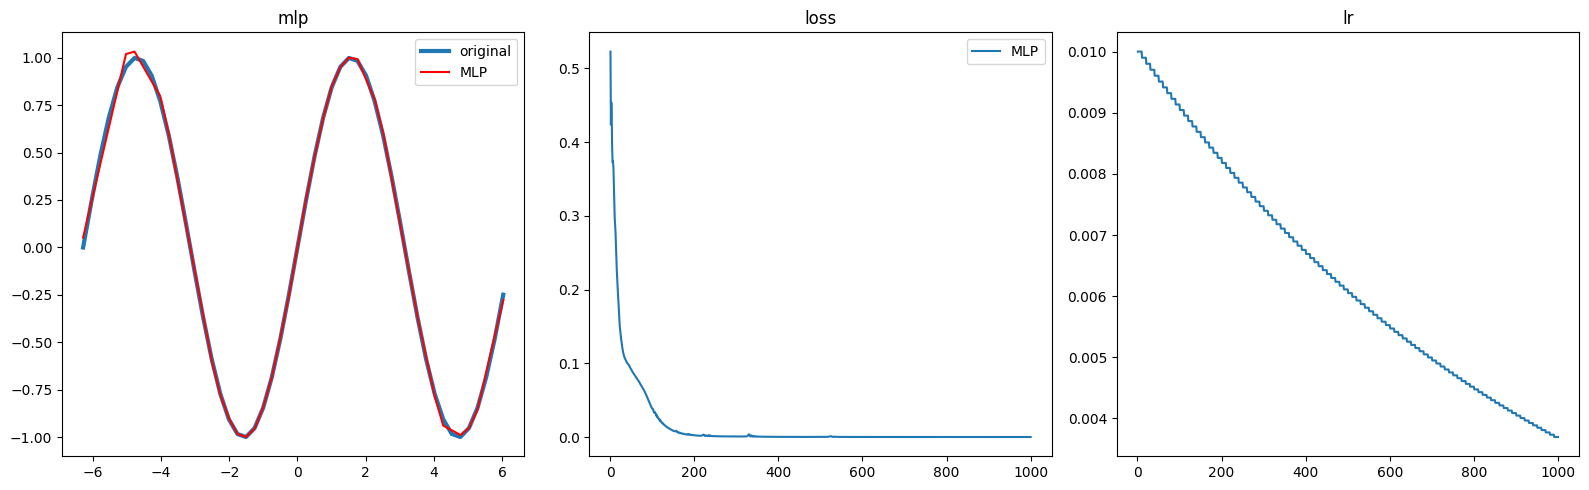

In [62]:
def PlotMLP(mlp, input_x, x):
    # input_x 是输入网络的x
    # sin_x 是列表, x 的取值, 一维数据
    mlp_eval = mlp.eval()
    mlp_y = mlp_eval(input_x)
    mlp_y_np = mlp_y.cpu().detach().numpy()
    plt.figure(figsize=(16,5))
    plt.subplot(133)
    plt.plot([i+1 for i in range(EPOCH)], lr_arr, label = 'lr')
    plt.title('lr')

    plt.subplot(132)
    plt.plot([i+1 for i in range(EPOCH)], mlp_loss, label = 'MLP')
    plt.title('loss')
    plt.legend()

    plt.subplot(131)
    plt.plot(x, torch.sin(x), label = "original", linewidth = 3)
    plt.plot(x,[y[0] for y in mlp_y_np], label='MLP', color = 'red')
    plt.title('mlp')
    plt.legend()

    plt.tight_layout()
    plt.show()
PlotMLP(mlp,input_x, x)

In [63]:
torch.save(mlp, 'mlp.pt')